# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [66]:
%%time

# Carregando as bibliotecas

import pandas            as pd 
import numpy             as np 
import seaborn           as sns
import matplotlib.pyplot as plt

from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics         import ConfusionMatrixDisplay
from sklearn.metrics         import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Belit\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [45]:
# Carregando as bases Y Test e Y Train
ytrain = pd.read_csv("C:\\Users\\Belit\\Downloads\\Modulo 17\\output\\df_train.csv", index_col=[0, 1])
ytest = pd.read_csv("C:\\Users\\Belit\\Downloads\\Modulo 17\\output\\df_test.csv", index_col=[0, 1])

In [46]:
ytrain = ytrain['1 tBodyAcc-mean()-X']

In [47]:
ytest = ytest['1 tBodyAcc-mean()-X']

In [48]:
ytrain.head()

   Unnamed: 0
0  0             5
1  1             5
2  2             5
3  3             5
4  4             5
Name: 1 tBodyAcc-mean()-X, dtype: int64

In [49]:
ytest.head()

   Unnamed: 0
0  0             5
1  1             5
2  2             5
3  3             5
4  4             5
Name: 1 tBodyAcc-mean()-X, dtype: int64

In [50]:
# Carregando as bases X Test e X Train
xtest = pd.read_csv("C:\\Users\\Belit\\Downloads\\Modulo 17\\output\\X_test.csv", index_col=[0, 1])
xtrain = pd.read_csv("C:\\Users\\Belit\\Downloads\\Modulo 17\\output\\X_train.csv", index_col=[0, 1])

In [51]:
xtest.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_test,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [52]:
xtrain.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,subject_train,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(xtrain, ytrain, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [54]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [55]:
ccp_alphas

array([0.00000000e+00, 1.79788623e-04, 1.79917209e-04, 1.80825599e-04,
       1.80874216e-04, 1.81055790e-04, 1.81356547e-04, 1.81356547e-04,
       2.41808729e-04, 2.41808729e-04, 2.72034820e-04, 2.72034820e-04,
       2.90170475e-04, 2.90170475e-04, 2.90170475e-04, 3.02260912e-04,
       3.02260912e-04, 3.22411639e-04, 3.36805016e-04, 3.49759055e-04,
       3.53412758e-04, 3.53491575e-04, 3.53645267e-04, 3.54828027e-04,
       3.54994428e-04, 3.58748855e-04, 3.59539369e-04, 3.60315985e-04,
       3.62713094e-04, 3.62713094e-04, 4.02749965e-04, 4.35255713e-04,
       4.43212879e-04, 4.49876706e-04, 4.53391367e-04, 4.77678406e-04,
       4.83617459e-04, 5.18161563e-04, 5.18161563e-04, 5.31940483e-04,
       5.89408778e-04, 6.40762191e-04, 6.56769781e-04, 6.73610032e-04,
       6.77064442e-04, 6.93885919e-04, 6.98718955e-04, 7.11487385e-04,
       8.16104461e-04, 8.51826205e-04, 8.70511425e-04, 8.70511425e-04,
       8.84113166e-04, 9.46208071e-04, 9.60163866e-04, 9.77587420e-04,
      

In [56]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(xtest)
importances = clf.feature_importances_
print('Importância das variáveis:', importances)

Importância das variáveis: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.28028805 0.01136571 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.12459438 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

In [57]:
importancia_das_variaveis = pd.Series(clf.feature_importances_, index=X_train.columns)
importancia_das_variaveis.sort_values(ascending=False, inplace=True)
importancia_das_variaveis.head(4)

57 tGravityAcc-energy()-X              0.280288
390 fBodyAccJerk-bandsEnergy()-1,16    0.253431
560 angle(Y,gravityMean)               0.172169
509 fBodyAccMag-energy()               0.134381
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [58]:
%%time

X_train_cut = X_train[['53 tGravityAcc-min()-X', '266 fBodyAcc-mean()-X', '560 angle(Y,gravityMean)']]
X_valid_cut = X_valid[['53 tGravityAcc-min()-X', '266 fBodyAcc-mean()-X', '560 angle(Y,gravityMean)']]
X_test_cut = xtest[['53 tGravityAcc-min()-X', '266 fBodyAcc-mean()-X', '560 angle(Y,gravityMean)']]

CPU times: total: 0 ns
Wall time: 12.7 ms


In [59]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
ccp_alphas

array([0.00000000e+00, 1.20904365e-04, 1.36017410e-04, 1.36017410e-04,
       1.45085238e-04, 1.45085238e-04, 1.45085238e-04, 1.45085238e-04,
       1.45085238e-04, 1.45085238e-04, 1.45085238e-04, 1.51130456e-04,
       1.51130456e-04, 1.54153065e-04, 1.55448469e-04, 1.55448469e-04,
       1.55448469e-04, 1.55448469e-04, 1.55448469e-04, 1.55448469e-04,
       1.58686979e-04, 1.58686979e-04, 1.58686979e-04, 1.58686979e-04,
       1.61205820e-04, 1.61205820e-04, 1.61205820e-04, 1.61205820e-04,
       1.61353987e-04, 1.62154089e-04, 1.63220892e-04, 1.63220892e-04,
       1.63326949e-04, 1.64869588e-04, 1.64869588e-04, 1.66243501e-04,
       1.67406043e-04, 1.67406043e-04, 1.68402508e-04, 1.69266111e-04,
       1.69266111e-04, 1.69656125e-04, 1.70021763e-04, 1.70021763e-04,
       1.70688515e-04, 1.71281183e-04, 1.72509886e-04, 1.72720521e-04,
       1.73113068e-04, 1.73113068e-04, 1.74102285e-04, 1.74639638e-04,
       1.74879527e-04, 1.75102873e-04, 1.75311329e-04, 1.75311329e-04,
      

In [60]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train_cut, y_train)
    clfs.append(clf)

CPU times: total: 9.16 s
Wall time: 11.8 s


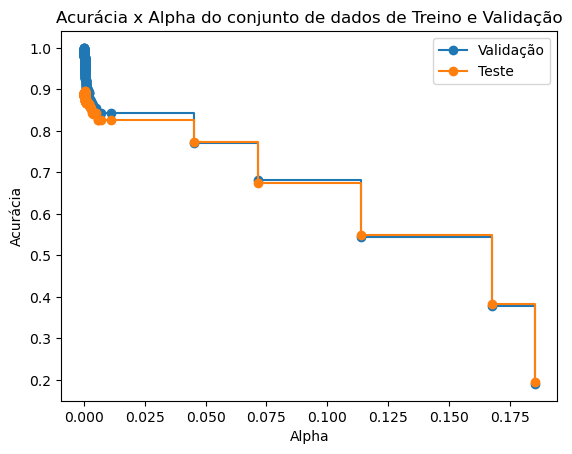

In [61]:
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_cut, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Alpha do conjunto de dados de Treino e Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="Validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [62]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 89.55


DecisionTreeClassifier(ccp_alpha=0.0002750574295732076, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.07


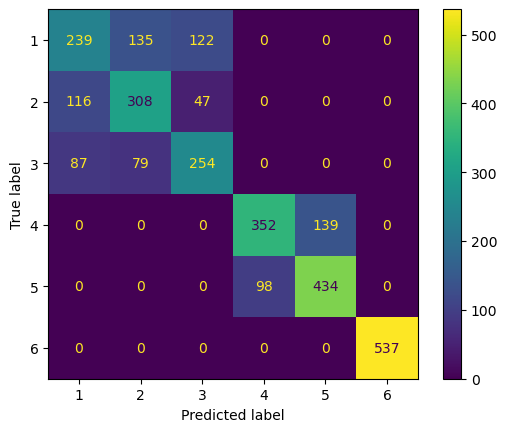

In [64]:
acuracia_teste = melhor_arvore.score(X_test_cut, ytest)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_cut, ytest);

Acurácia: 72.07


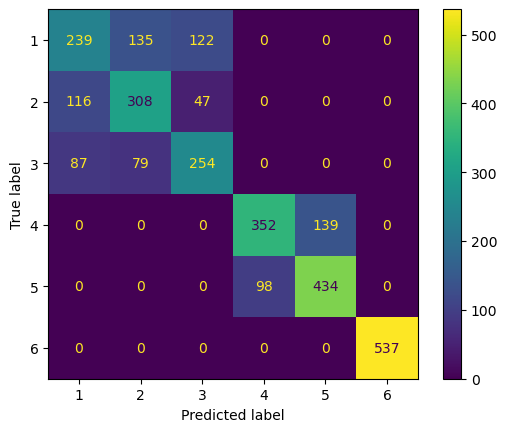

In [69]:
acuracia_teste = melhor_arvore.score(X_test_cut, ytest)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test_cut, ytest);
plt.show()